<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"> 
        <h1>Probability And Statistics For Everyone</h1>
        <h1>Descriptive Statistics</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
        @bgoncalves, @data4sci</p></div>
</div>

In [1]:
from collections import Counter
import numpy as np

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import sklearn
from sklearn.linear_model import LinearRegression

import scipy
from scipy.stats import pearsonr

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 22.4.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 593e30c0dfcafd50401dbb083769424707ebe00c

scipy     : 1.6.1
pandas    : 1.5.3
seaborn   : 0.11.0
watermark : 2.1.0
json      : 2.0.9
sklearn   : 0.0
numpy     : 1.24.2
matplotlib: 3.3.2



Set the default style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Descriptive Statistics

Let us start by generating 1,000 randomly chosen integers around 100. This will be our "dataset"

In [4]:
N = 1000
values = np.random.normal(100, 15, N).astype('int')

we can take a quick look at a few of the values generated

In [5]:
values[:10]

array([108,  92, 101,  97, 128,  97, 112,  95,  71, 107])

## Mean

The mean is defined as $$\mu=\frac{1}{N}\sum_{i=1}^Nx_i$$

In [6]:
mean = 0

for i in range(N):
    mean += values[i]
    
mean /= N

In [7]:
mean

99.727

or, more conveniently:

In [8]:
np.mean(values)

99.727

## Standard deviation

Similarly, for the standard deviation, we have $$\sigma=\sqrt{\frac{1}{N}\sum_{i=1}^N\left(x_i-\mu\right)^2} $$

In [9]:
std = 0

for i in range(N):
    std += (values[i]-mean)**2
    
std /= N
std = np.sqrt(std)

In [10]:
std

14.948928757606682

or

In [11]:
np.std(values)

14.948928757606682

## Extreme values

The maximum and minimum are

In [12]:
Max = np.max(values)
Max

142

In [13]:
Min = np.min(values)
Min

48

## Histogram

We can generate a histogram by counting how many times we see each value. Here we use the Max and Min values to generate an empty array of zeros within that range.

In [14]:
hist = np.zeros(Max-Min+1)
x = np.arange(Min, Max+1)

for value in values:
    hist[value-Min] += 1

And to visualize it, we must only generate a bar plot with the counts for each value

Text(0, 0.5, 'Count')

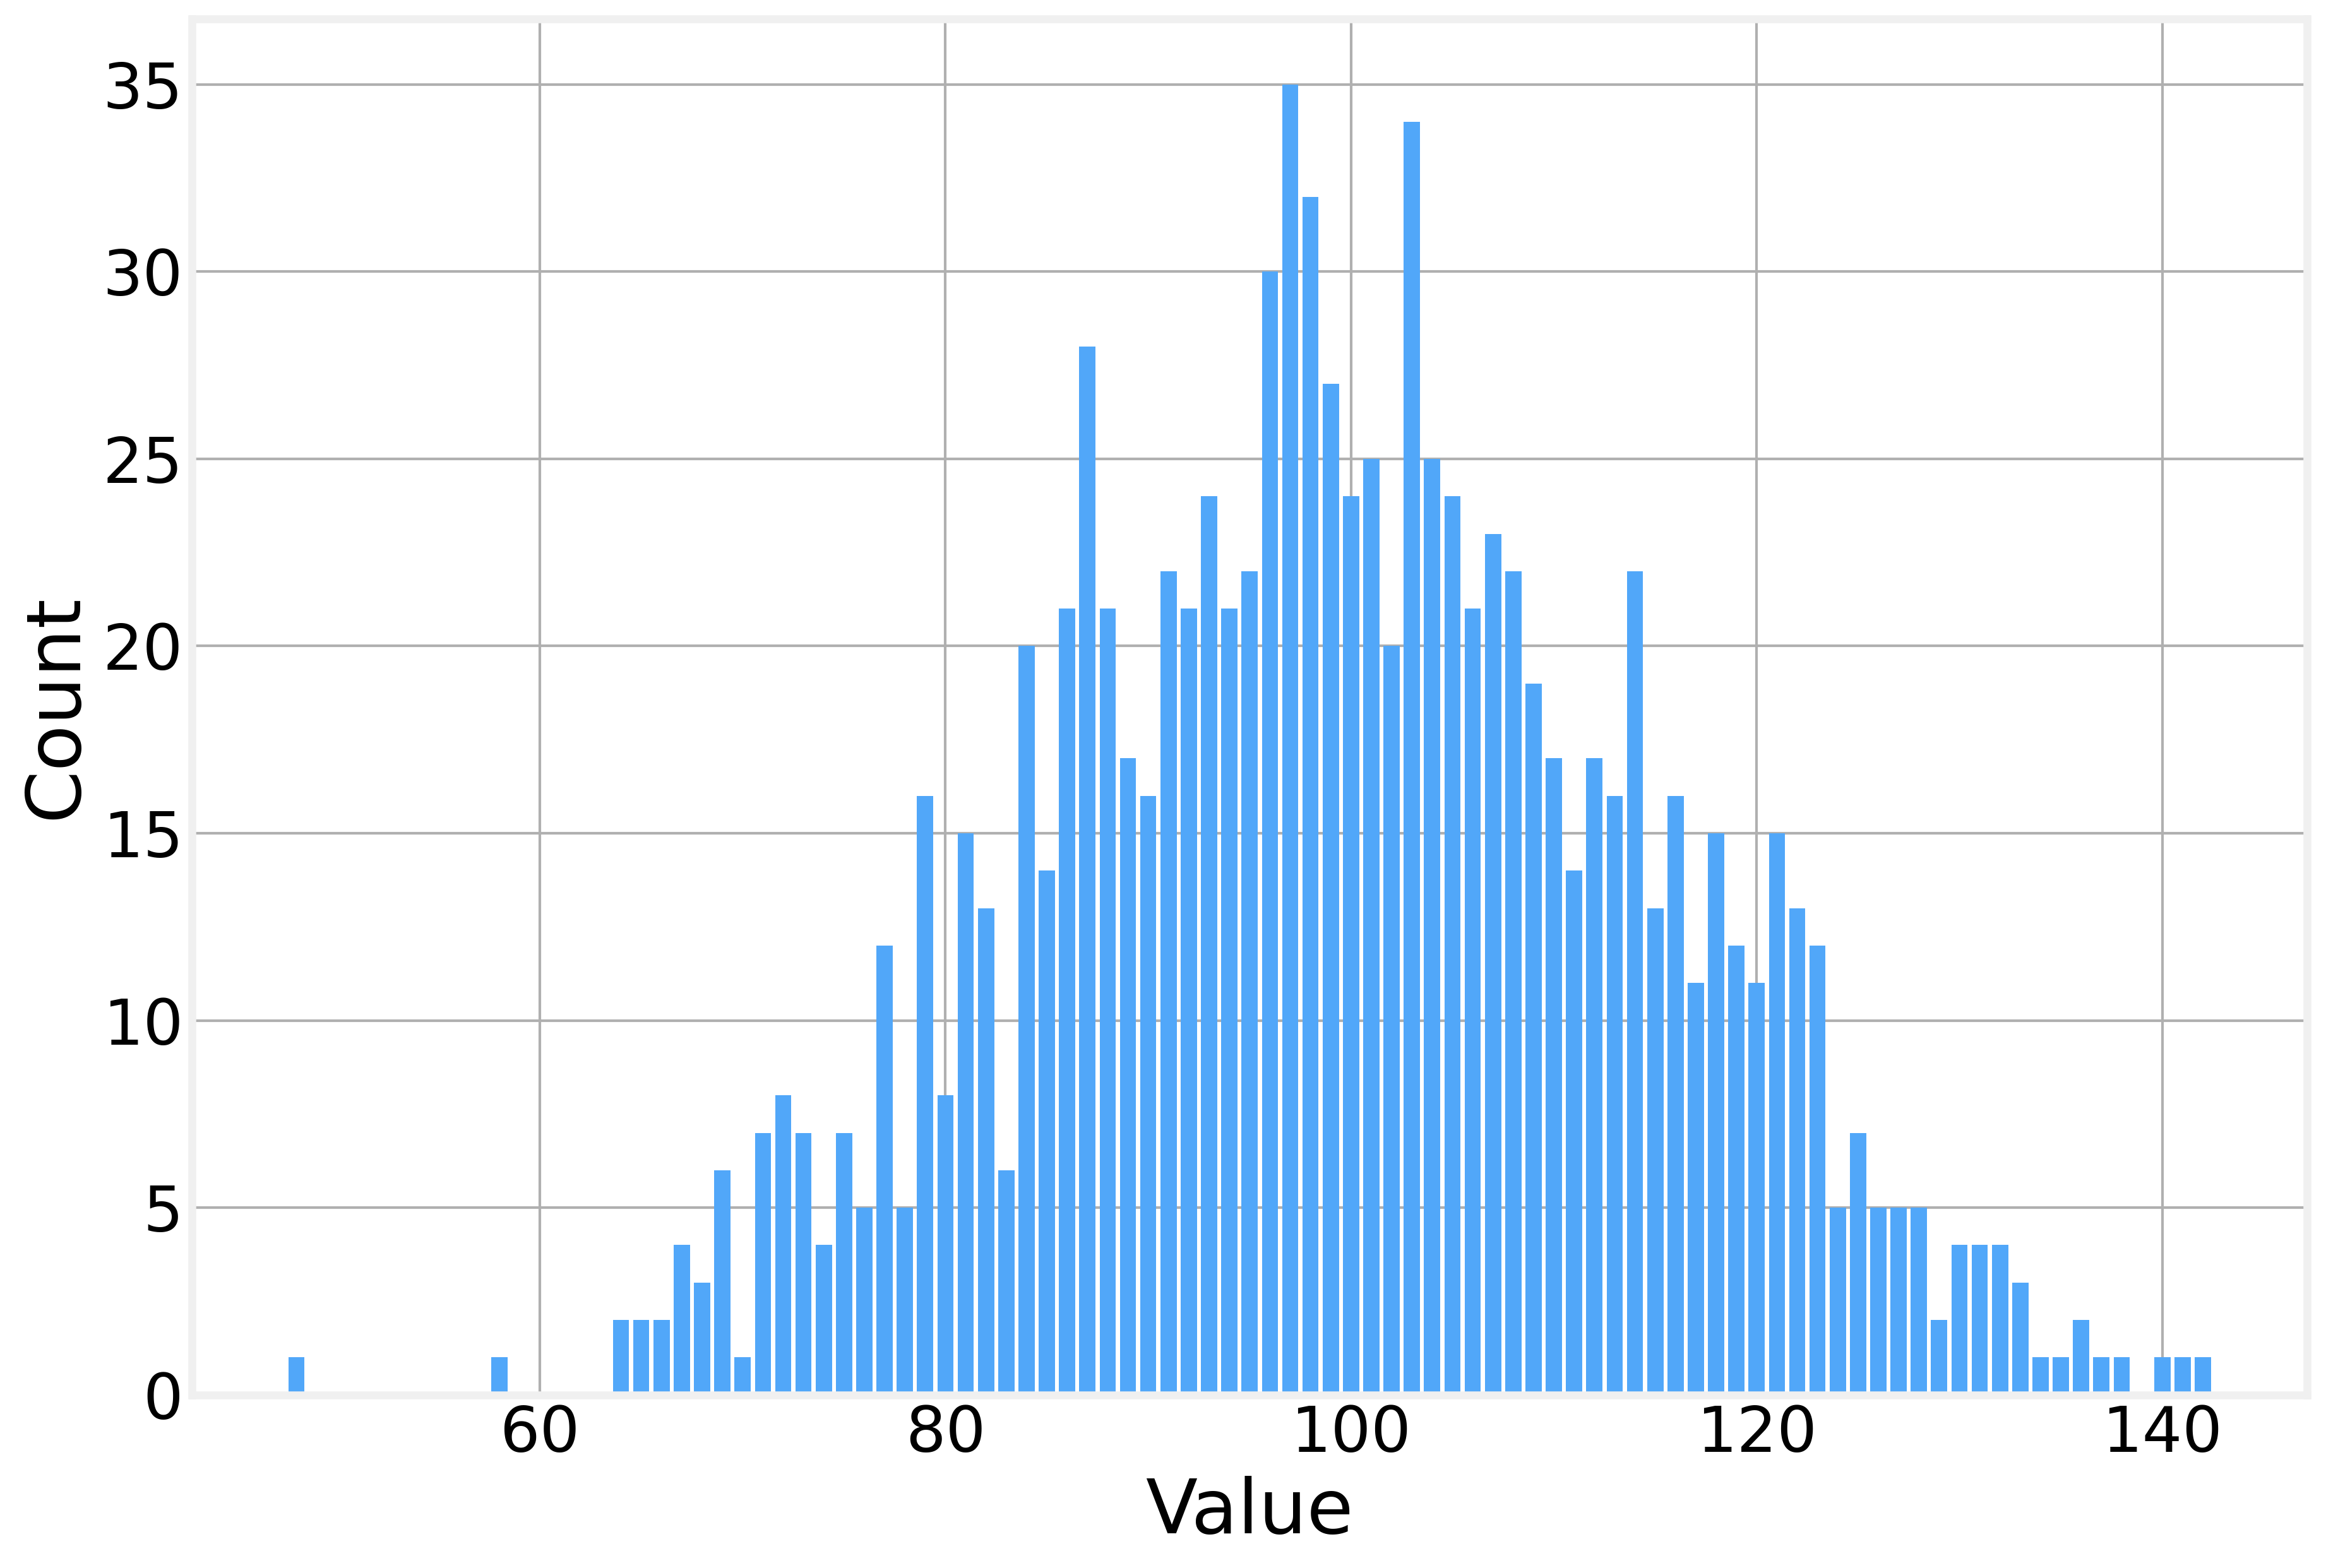

In [15]:
fig, ax = plt.subplots(1)
ax.bar(x, hist)
ax.set_xlabel('Value')
ax.set_ylabel('Count')

A more pythonic way would be to use numpy's histogram function where we must specify the number of bins of we want to include in our histogram. The count associated with each bin will be the number of values that fall within that range.

This function returns the counts for each bin, as well as the bin edges (the min and max value for each edge). Since the bins are continuous, the minimum value of bin $i$ is the maximum value of bin $i-1$ and the maximum value of bin $i$ is the minimum value of bin $i+i$, so the bin_edges array contains $bins+1$ values, the minimum value for each bin, plus the maximum value for the last one.

In [16]:
counts, bin_edges = np.histogram(values, bins=50)

Text(0, 0.5, 'Count')

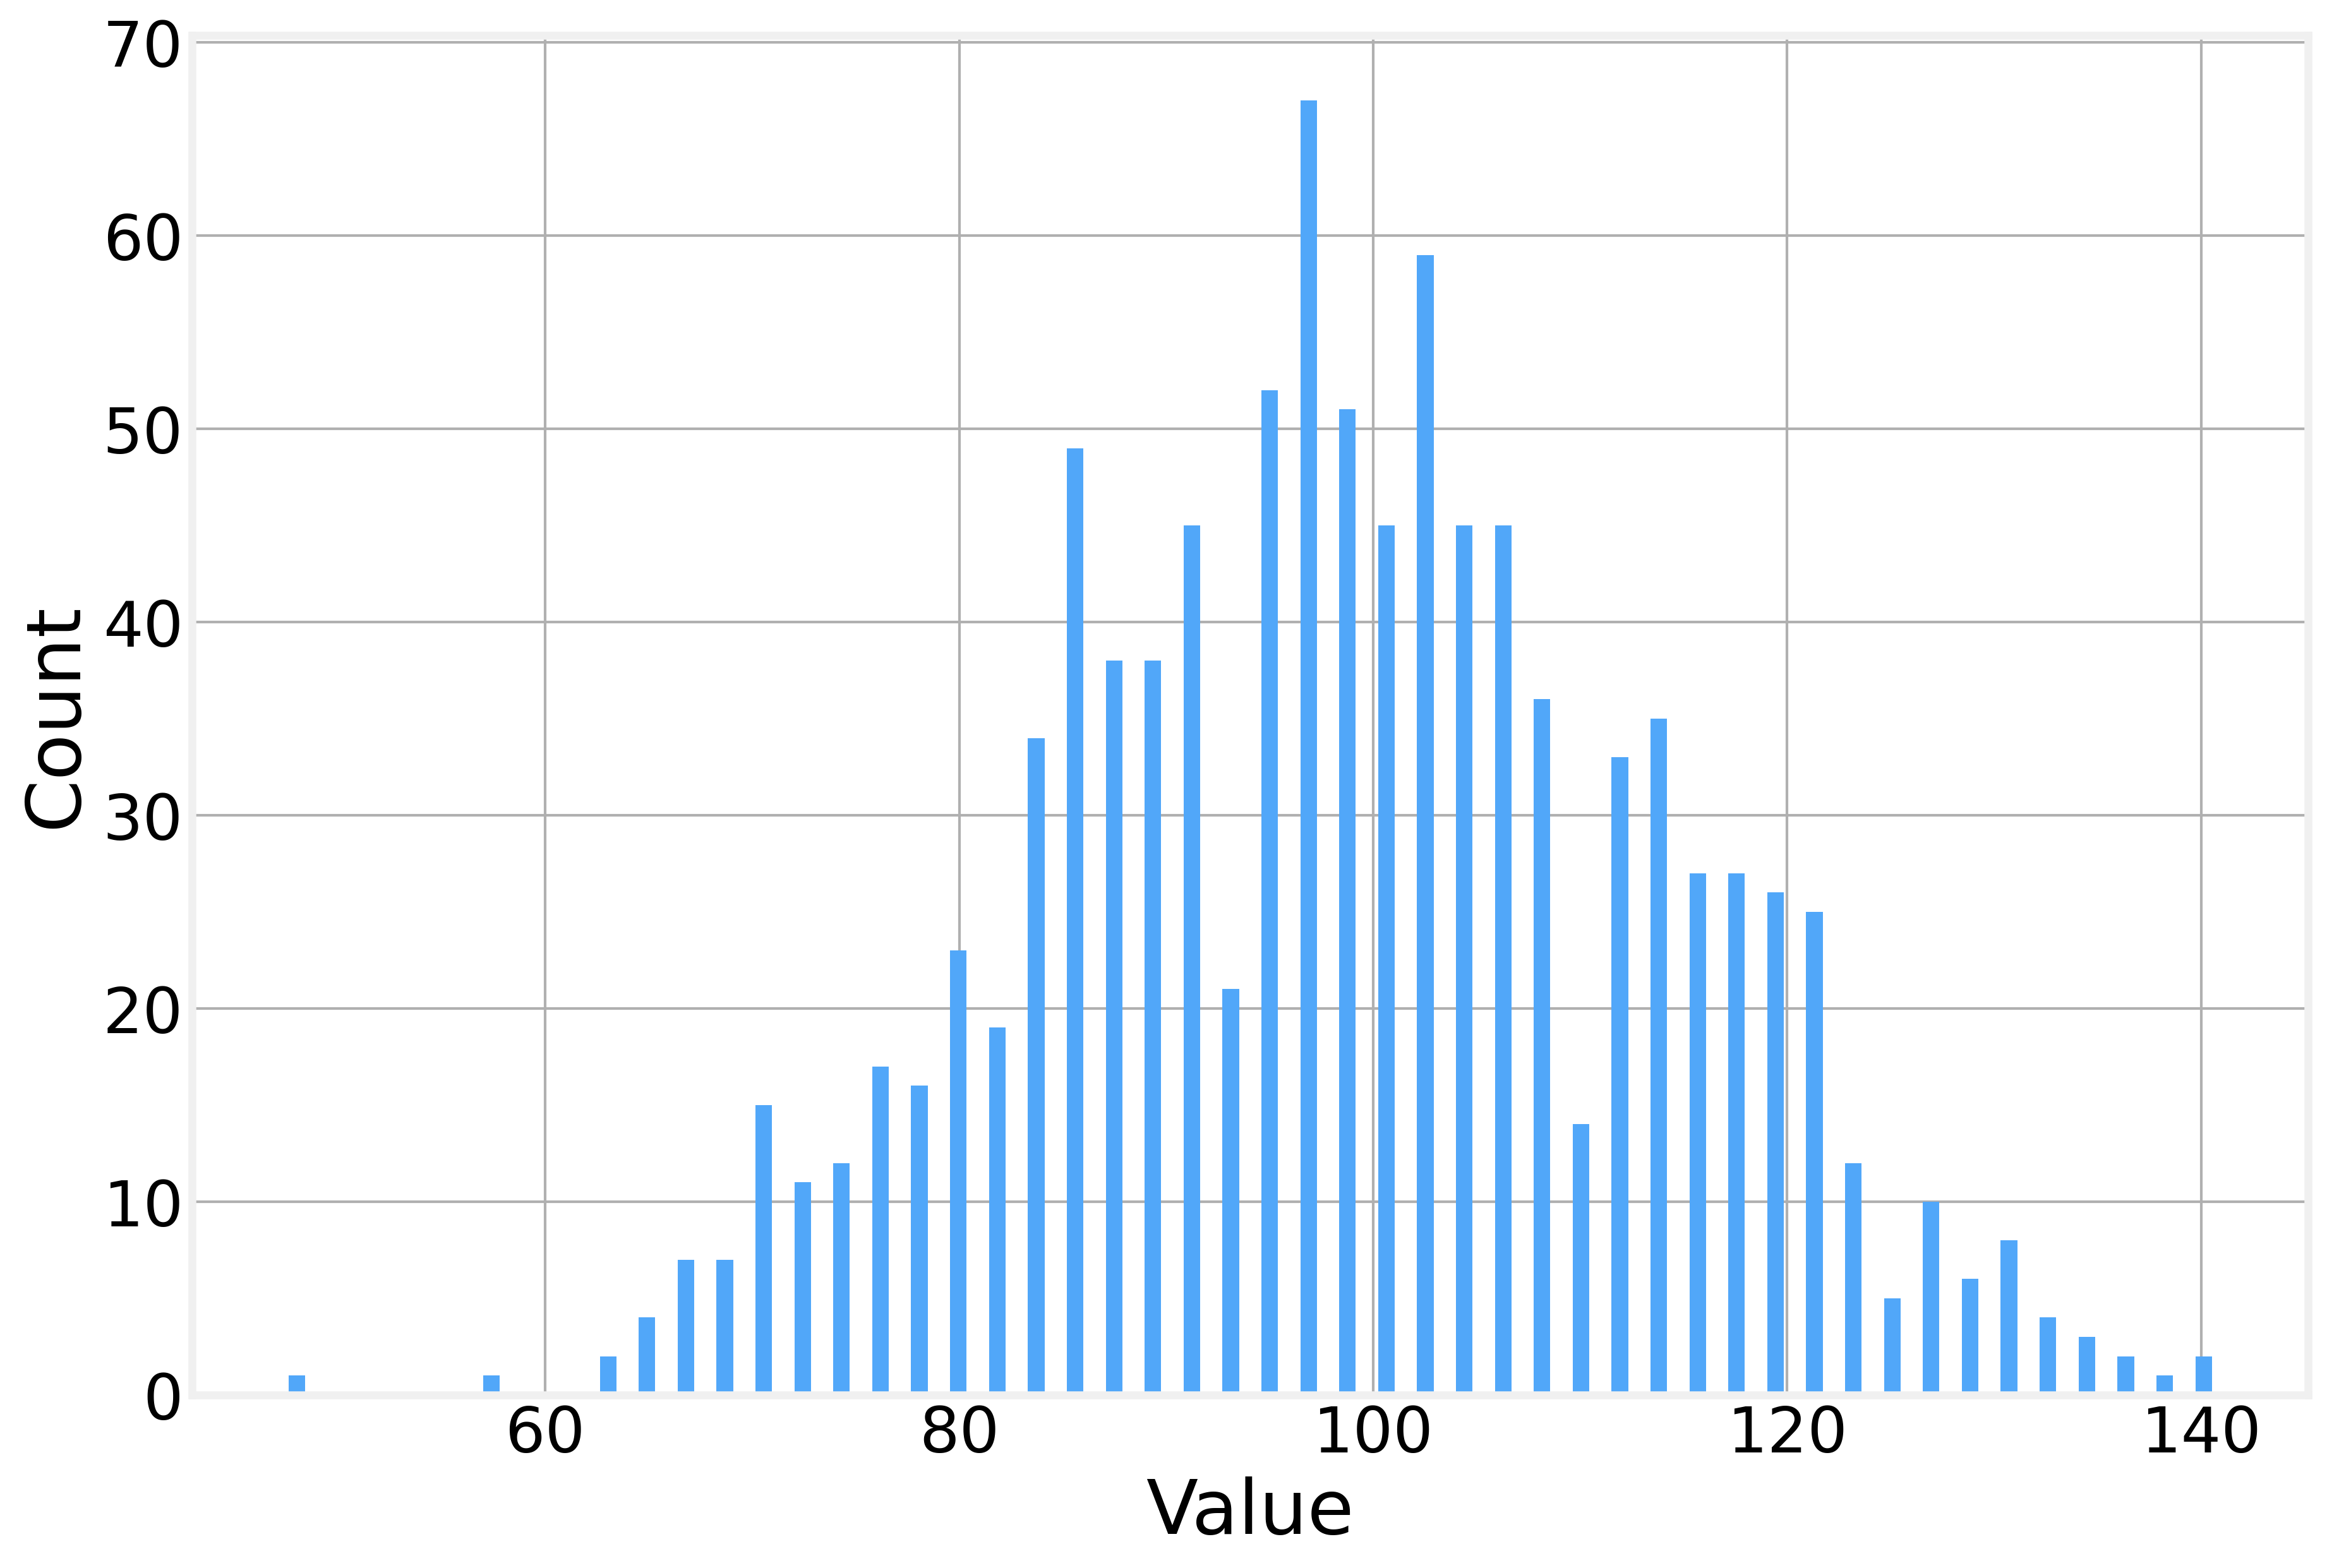

In [17]:
fig, ax = plt.subplots(1)
# We exclude the last bin edge so that we have as many x as y values
ax.bar(bin_edges[:-1], counts)
ax.set_xlabel('Value')
ax.set_ylabel('Count')

Unfortunately, not all datasets are as easily visualizable as this one so we often have to rely purely on descriptive statistics to compare multiple datasets

# Anscombe quartet

The Anscombe quartet is a set of 4 different dataset with multiple summary statistics having the same value. Even a straight line fit produces the same set of parameters

Text(0.5, 0, 'x')

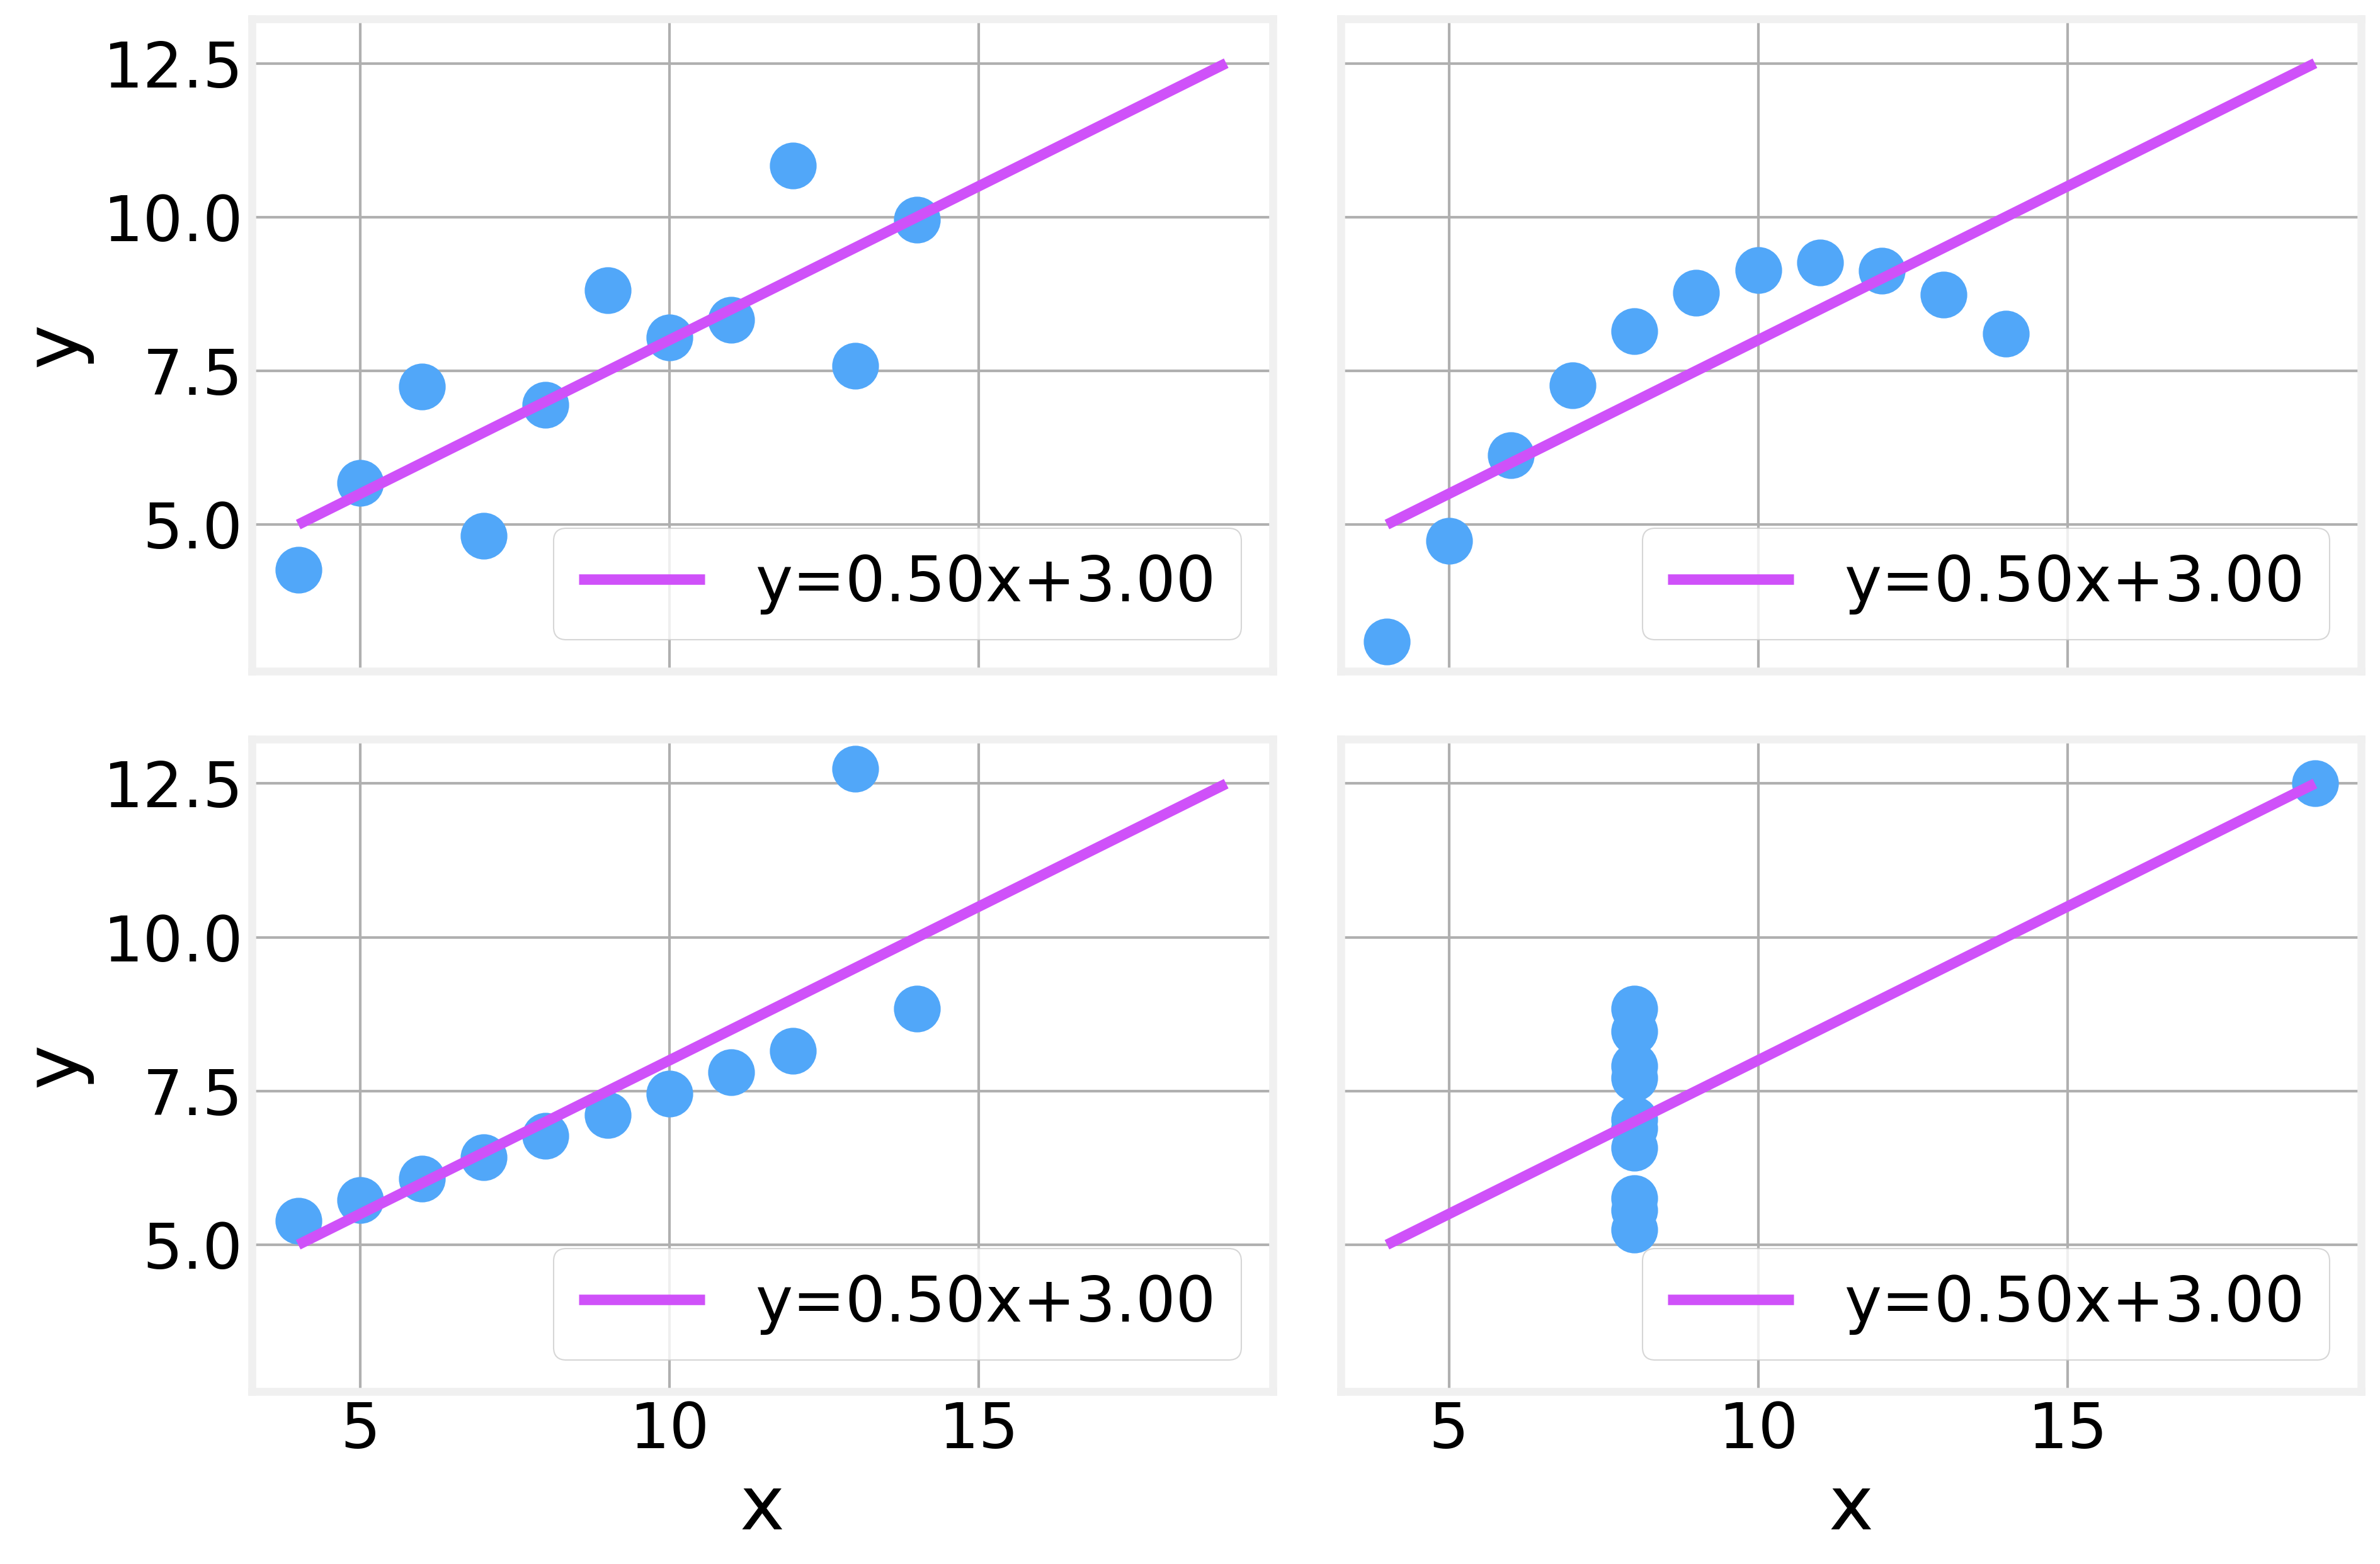

In [18]:
fig, ax_lst = plt.subplots(2, 2, sharex=True, sharey=True)
ax_lst = np.array(ax_lst).flatten()

for i in range(1, 5):
    data = pd.read_csv('data/Anscombe%u.dat' % i, header=None, sep=' ')
    data.plot(x=0, y=1, kind='scatter', s=300, ax=ax_lst[i-1], label=None)
    
    lm = LinearRegression()
    lm.fit(data[0].values.reshape(-1, 1), data[1])
    x = np.linspace(4, 19, 10).reshape(-1, 1)
    y = lm.predict(x)
    
    ax_lst[i-1].plot(x, y, color=colors[1], label='y=%1.2fx+%1.2f' % (lm.coef_[0], lm.intercept_))
    ax_lst[i-1].legend(loc='lower right')

ax_lst[0].set_ylabel('y')
ax_lst[2].set_ylabel('y')
ax_lst[2].set_xlabel('x')
ax_lst[3].set_xlabel('x')

This example highlights the necessity of using slightly more sophisticated statistics

# Boxplots

A boxplot provides a quick overview of the full distribution of our data. For our example above, we have

<AxesSubplot:>

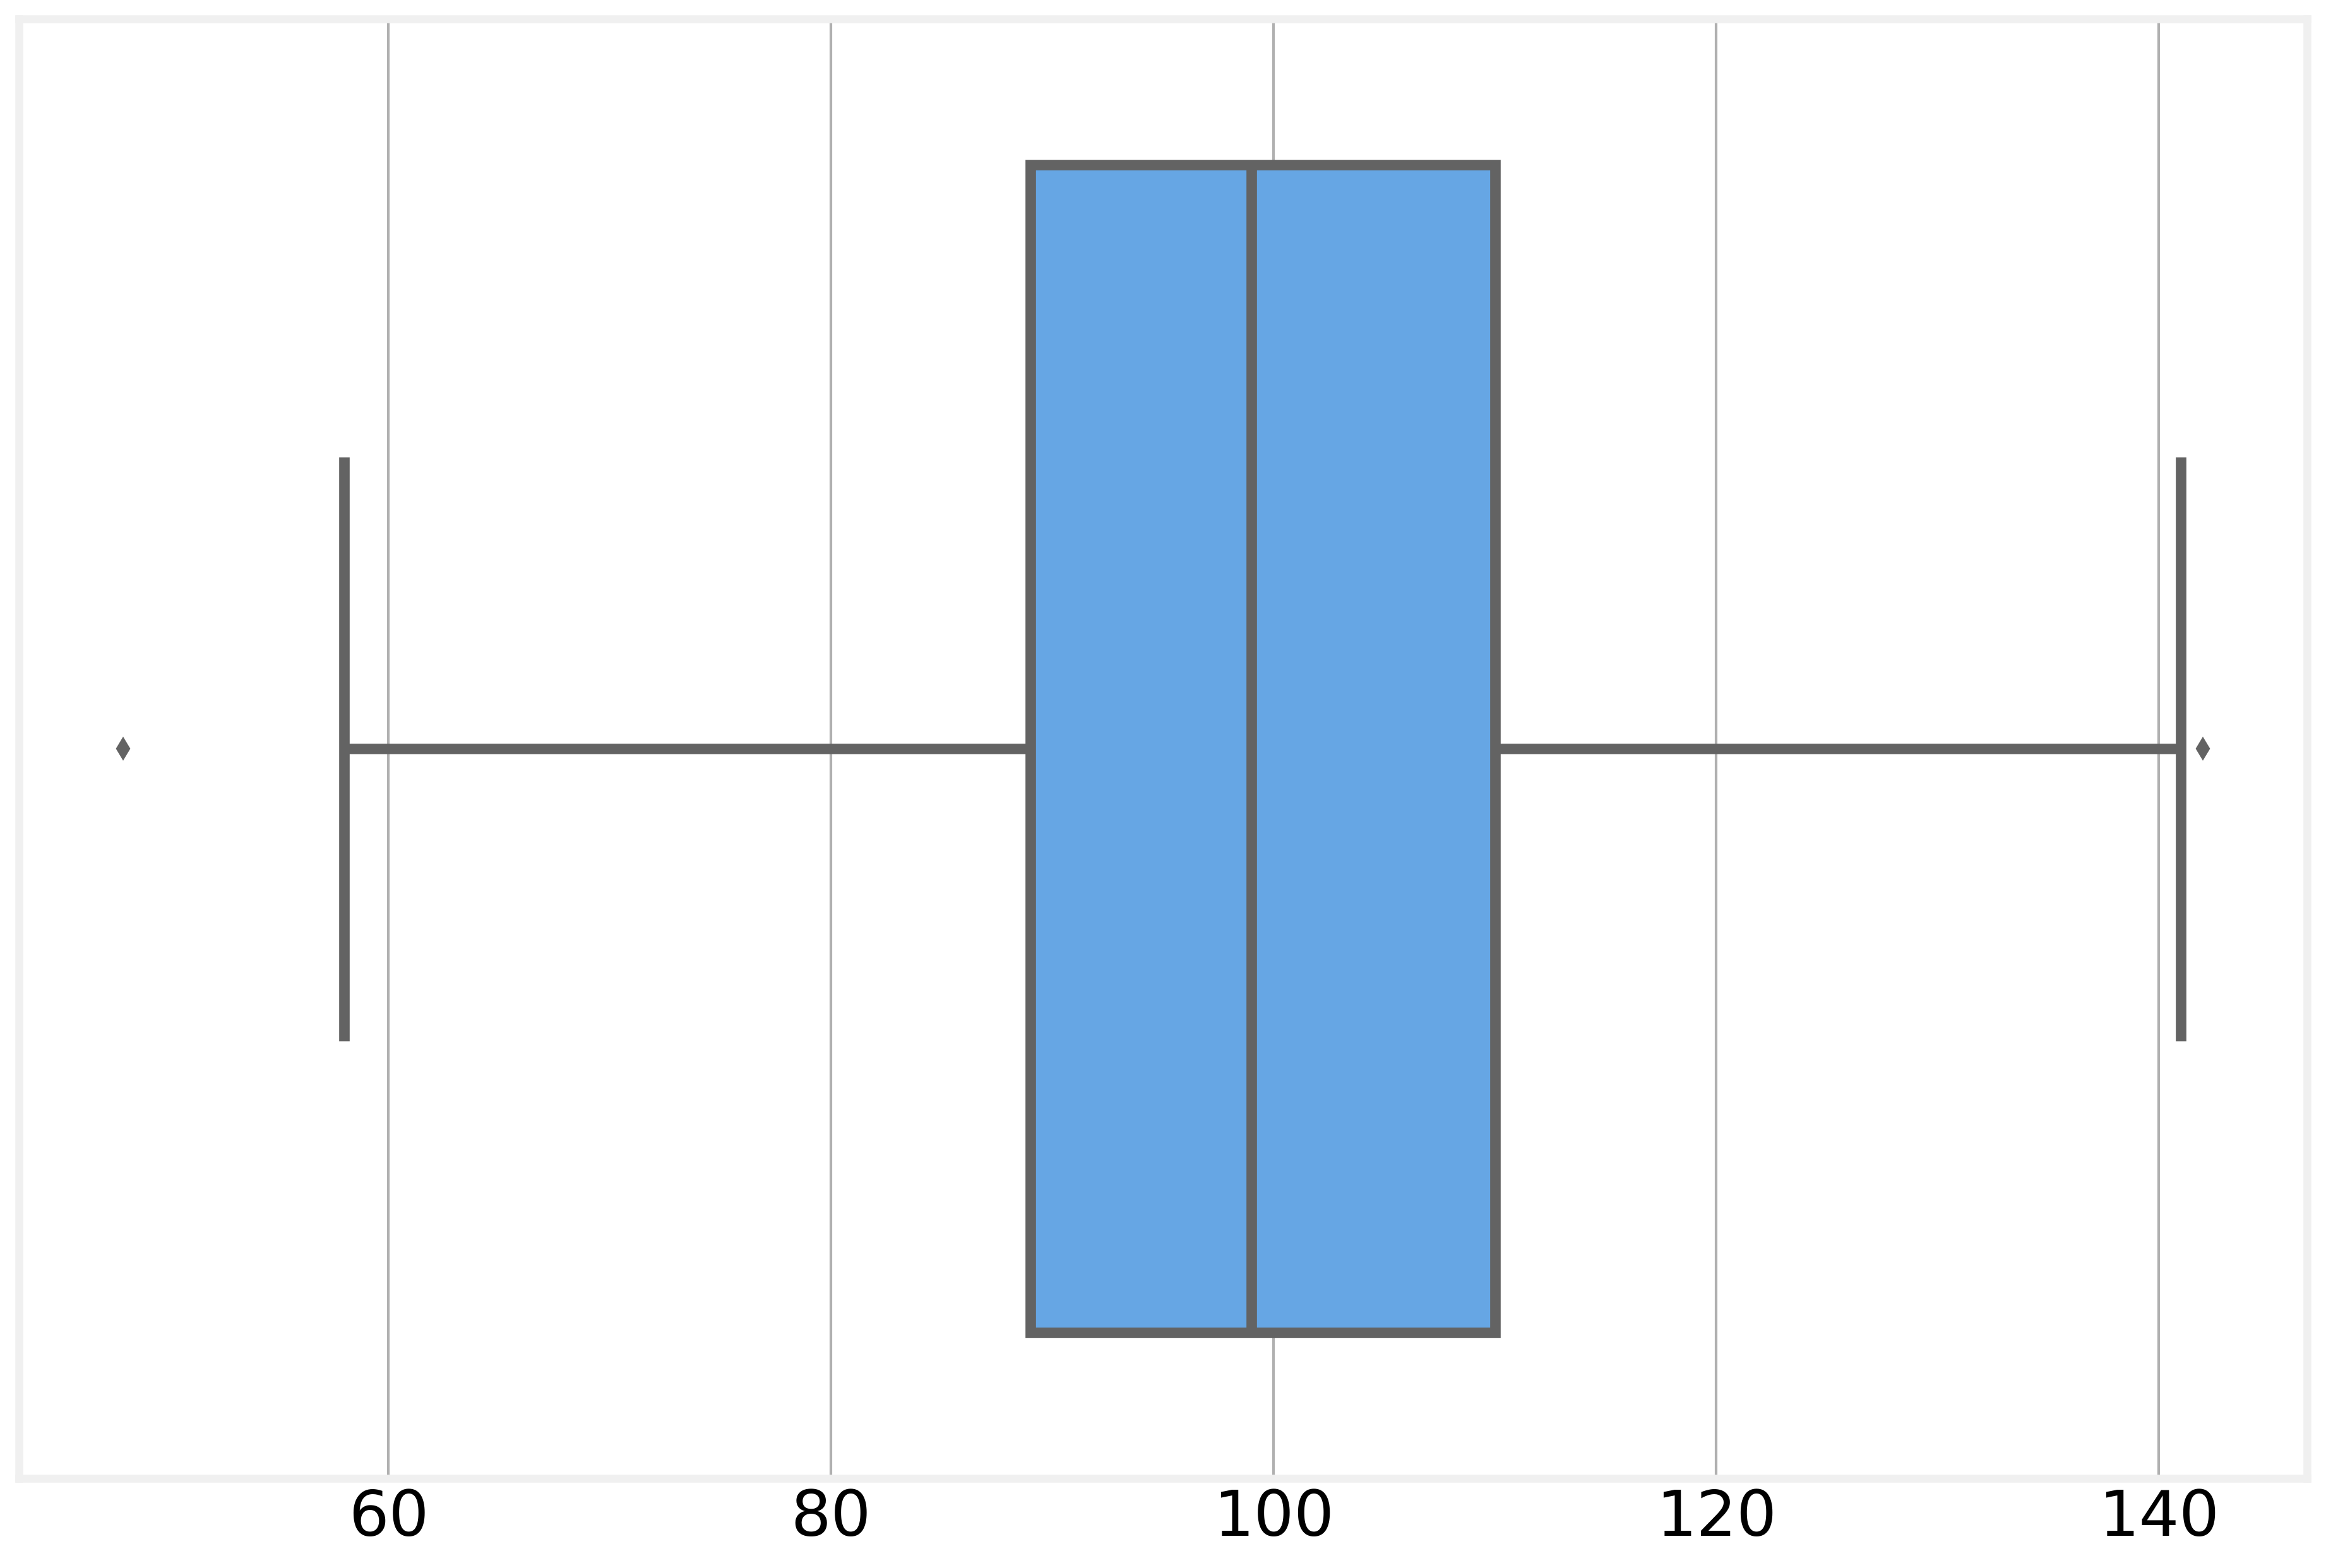

In [19]:
sns.boxplot(x=values)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f91b93cb580>,
 'caps': [<matplotlib.lines.Line2D at 0x7f91b93cbc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f91b93cb220>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9190558340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f91905586a0>],
 'means': []}

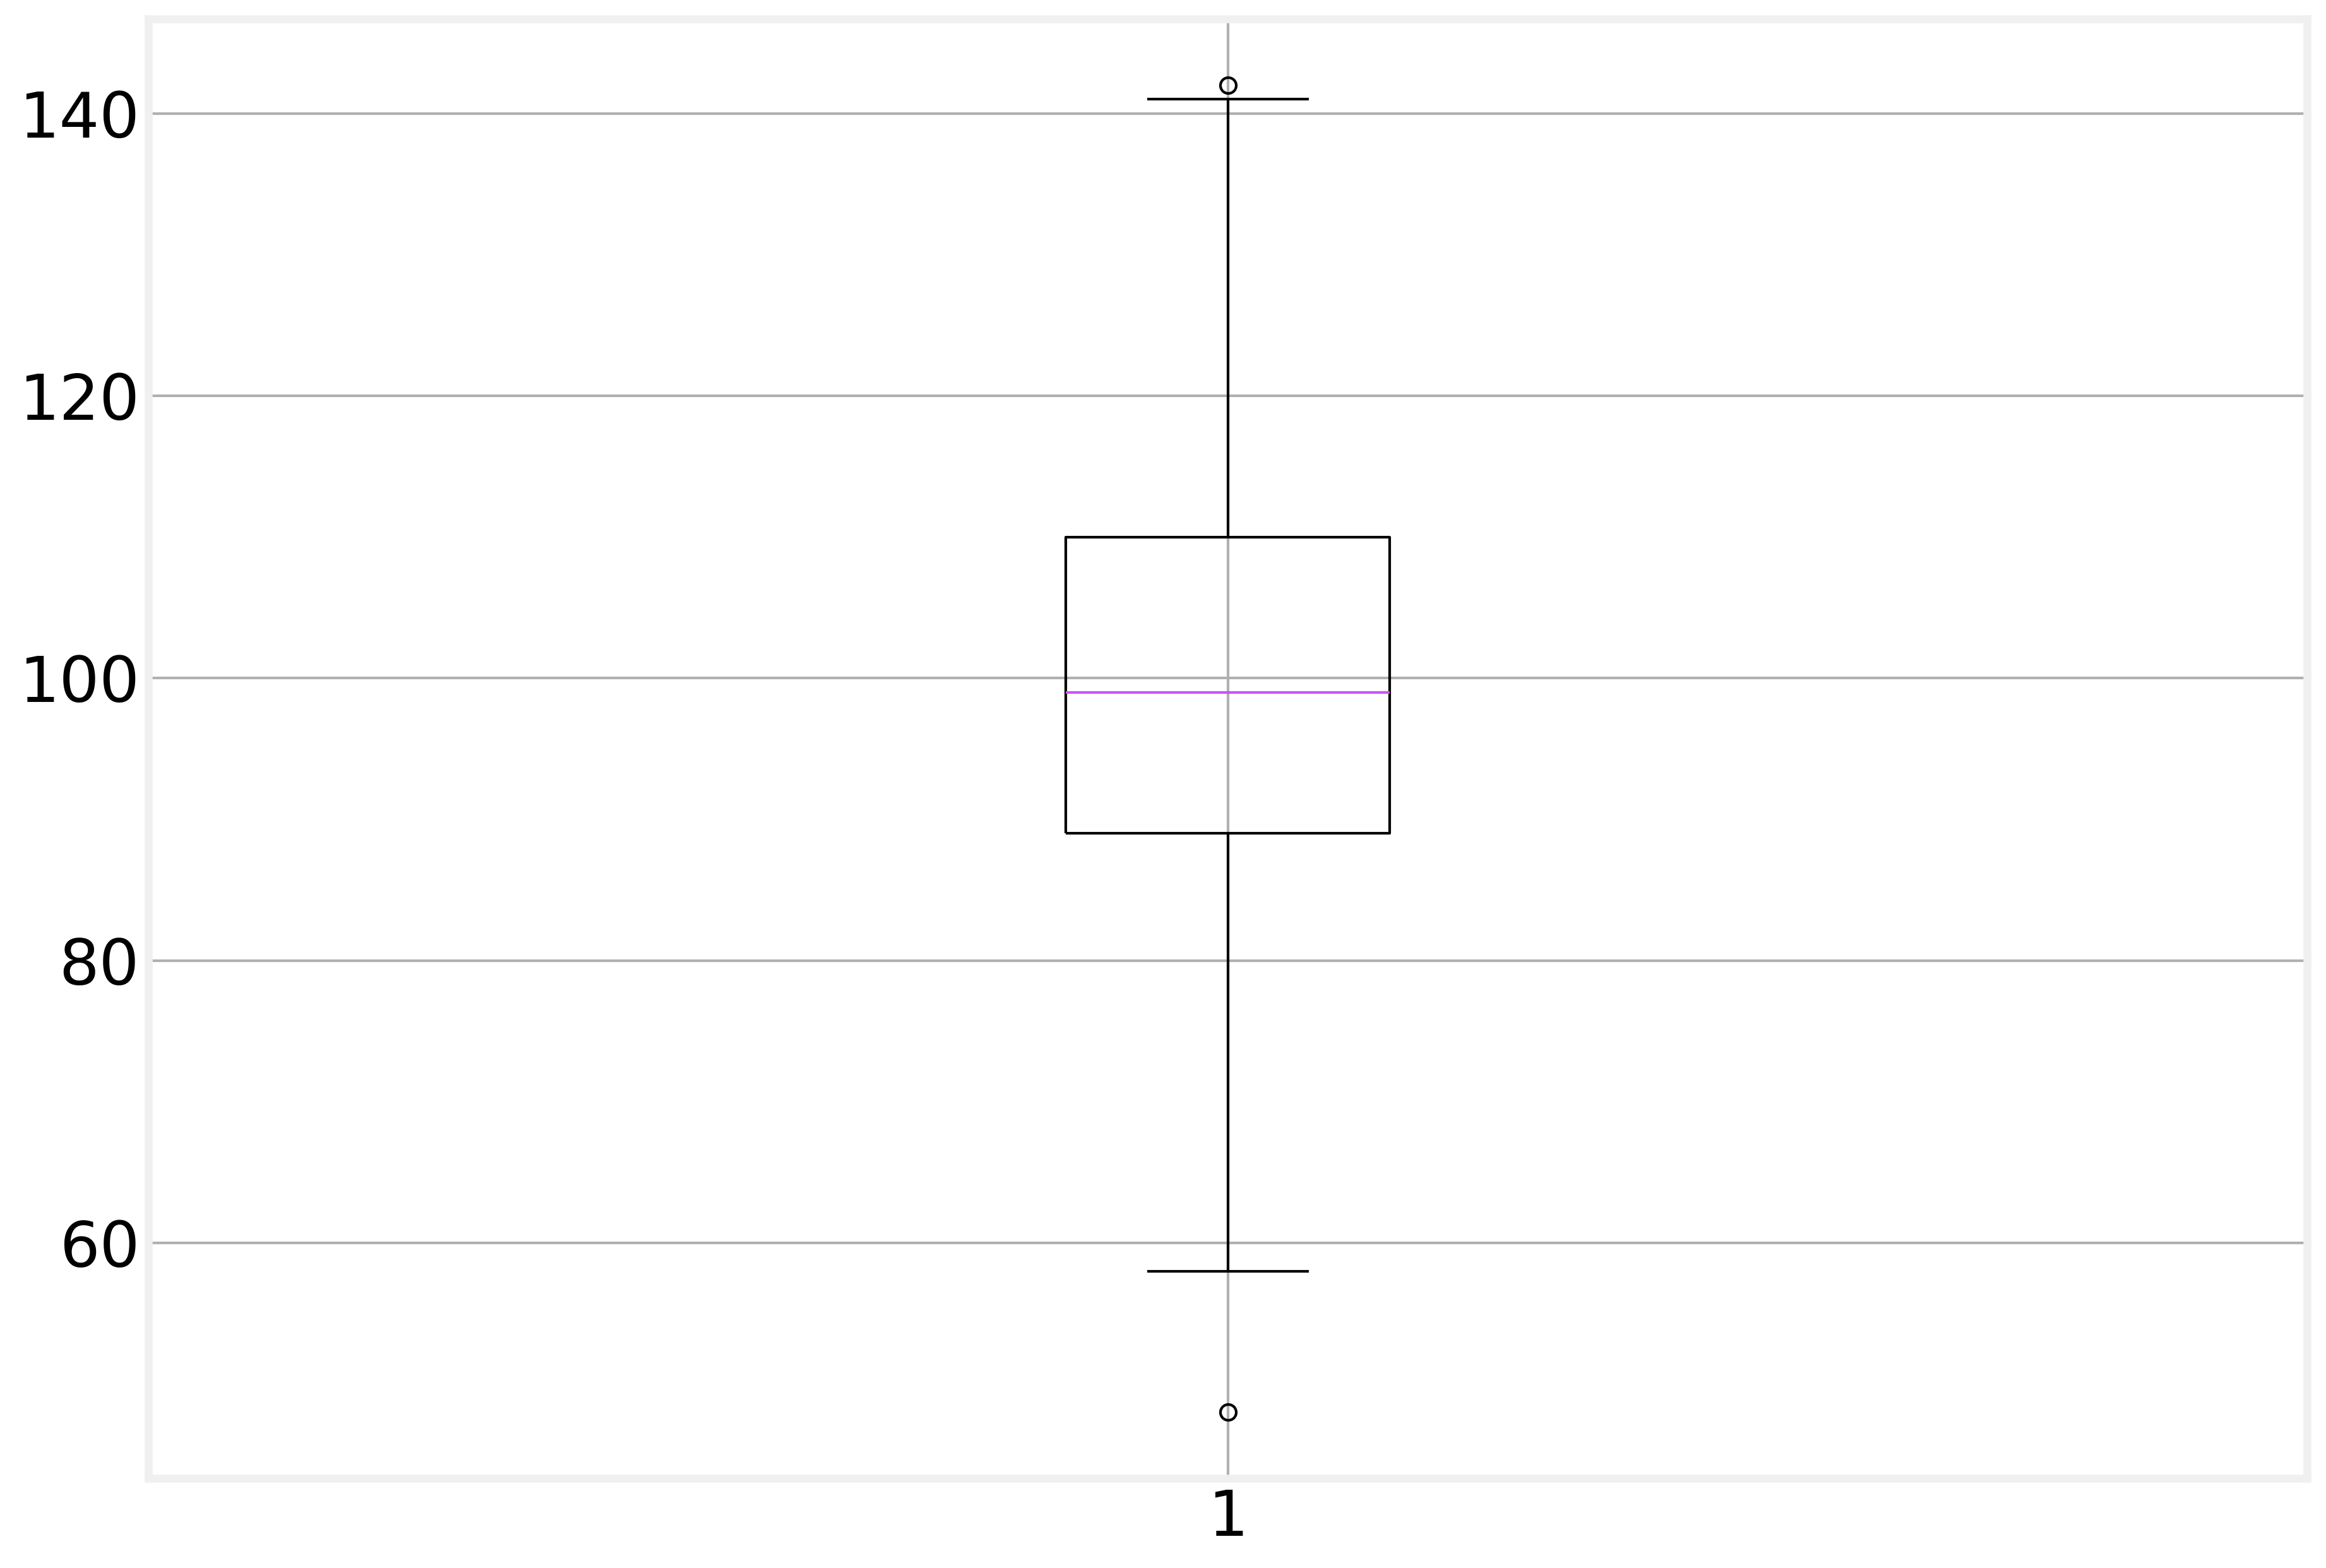

In [20]:
plt.boxplot(values)

which provides us with a lot of information on our distribution

## Median

The median is the 50% quantile of the distribution. The value in the center when we sort all the values. If the number of points is even, then the median is defined as the average of the two center points

In [21]:
sorted_values = sorted(values)

In [22]:
N = len(sorted_values)

In [23]:
median = (sorted_values[N//2-1] + sorted_values[N//2+1])/2
median

99.0

The box is defined by the 25% and 75% quantiles:

In [24]:
sorted_values[N//4]

89

In [25]:
sorted_values[(3*N)//4]

110

In [26]:
np.quantile(values, [.25, .75])

array([ 89., 110.])

The whiskers are give by 1.5x the interquantile range: 1.5x the difference between the 75th and 25th quantiles calculated above

In [27]:
IQR = np.quantile(values, .75) - np.quantile(values, .25)

In [28]:
IQR

21.0

so the left whisker extends all the way to

In [29]:
np.quantile(values, .25) - 1.5*IQR

57.5

while the right whisker extends to

In [30]:
np.quantile(values, .75) + 1.5*IQR

141.5

Any points further left or right of these limits are known as outliers

## 95% Reference Range

The 95% Reference Range is defined as the central 95% range of the values. In other words, the range between the 2.75% and 97.25% quantiles

In [31]:
np.quantile(values, .975)

129.0

In [32]:
np.quantile(values, .025)

71.0

In this example, 95% of the values are in the range between these two values

# Correlation

The Pearson correlation coefficient is defined as $$ \rho\left(x, y\right)=\frac{1}{N-1}\sum_{i=1}^N\frac{\left(x_i-\mu_x\right)\left(y_i-\mu_y\right)}{\sigma_x\sigma_y} $$

which we can easily implement as:

In [33]:
def pearson(x, y):
    N = len(x)
    meanx = x.mean()
    meany = y.mean()
    stdx = x.std()
    stdy = y.std()
    
    return np.sum((x - meanx) * (y - meany)) / (stdx * stdy * (N - 1))

For the first dataset of the Anscombe quartet

In [34]:
data = pd.read_csv('data/Anscombe1.dat', header=None, sep=' ')
data

,0,1
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


We have

In [35]:
pearson(data[0], data[1])

0.81642051634484

We can also use a standard implementation from scipy

In [36]:
pearsonr(data[0], data[1])

(0.81642051634484, 0.0021696288730787875)

which in addition to the value of the pearson correlation it also provides us with the p-value

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>